# **Credit card Fraud Detection**

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('card_transdata.csv')
df.head(20)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Detecting Outliers

<AxesSubplot:xlabel='distance_from_home', ylabel='distance_from_last_transaction'>

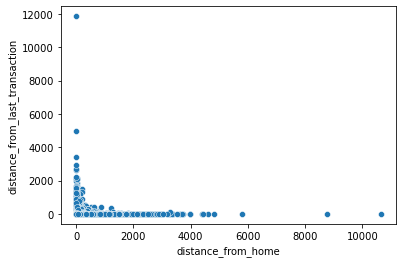

In [27]:
sns.scatterplot(x = df.iloc[:, 0], y = df.iloc[:, 1], data = df)

<AxesSubplot:xlabel='repeat_retailer', ylabel='ratio_to_median_purchase_price'>

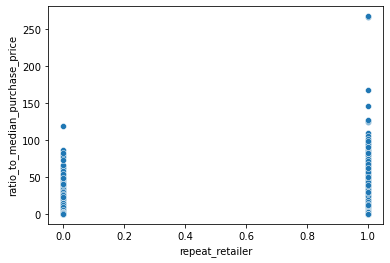

In [28]:
sns.scatterplot(y = df.iloc[:, 2], x = df.iloc[:, 3], data = df)

## Removing Outlier

In [29]:
arr1 = np.where(df['distance_from_home']>4000)
arr2 = np.where(df['distance_from_last_transaction']>4000)
arr3 = np.where(df['ratio_to_median_purchase_price']>100)


In [30]:
df.drop(arr1[0], inplace = True)
df.drop(arr2[0], inplace = True)
df.drop(arr3[0], inplace = True)

In [31]:
df.shape

(999980, 8)

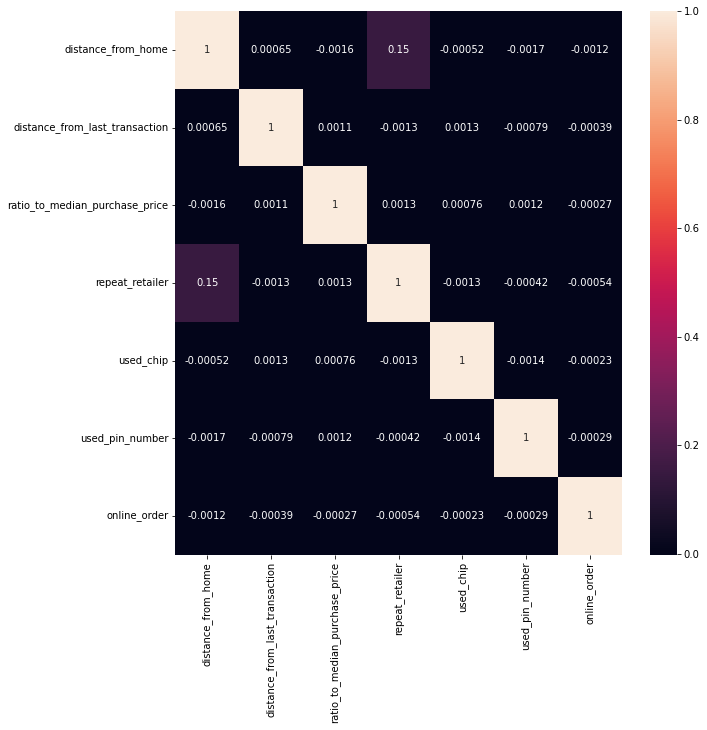

In [32]:
features1=df.iloc[:,:-1]
cor=features1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

## Feature Scaling

In [33]:
features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

In [34]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
features = sts.fit_transform(features)

## Splitting the data

In [35]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)

## Model training

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, labels_train)

LogisticRegression()

In [37]:
labels_pred = model.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_score(labels_test, labels_pred)*100

0.9587258411834904

### KNN Classification



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(features_train, labels_train)

labels_pred = classifier.predict(features_test)

accuracy_score(labels_test, labels_pred)*100

0.9986566397994626

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
classifier = RandomForestClassifier()
classifier.fit(features_train, labels_train)
labels_pred = classifier.predict(features_test)
accuracy_score(labels_test, labels_pred)*100

0.9999833329999933

### AdaBoostClassifier

In [40]:
classifier = AdaBoostClassifier()
classifier.fit(features_train, labels_train)
labels_pred = classifier.predict(features_test)
accuracy_score(labels_test, labels_pred)*100

0.9997866623999146

### GradientBoostingClassifier

In [41]:
classifier = GradientBoostingClassifier()
classifier.fit(features_train, labels_train)
labels_pred = classifier.predict(features_test)
accuracy_score(labels_test, labels_pred)*100

0.9996533263998614

In [42]:
from sklearn.metrics import confusion_matrix, r2_score, classification_report

print(classification_report(labels_test, labels_pred))
print(r2_score(labels_test, labels_pred))
print(confusion_matrix(labels_test, labels_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273685
         1.0       1.00      1.00      1.00     26309

    accuracy                           1.00    299994
   macro avg       1.00      1.00      1.00    299994
weighted avg       1.00      1.00      1.00    299994

0.9956669812170219
[[273674     11]
 [    93  26216]]


Text(0.5, 1.0, 'Output Confusion Matrix')

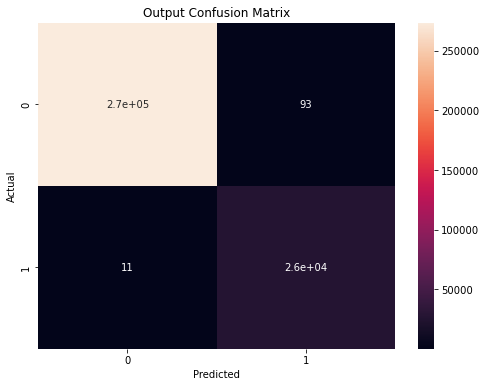

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(labels_pred,labels_test)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True)
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [44]:
print(labels_pred)

[1. 0. 0. ... 0. 0. 1.]


In [45]:
print(label_test)

NameError: name 'label_test' is not defined